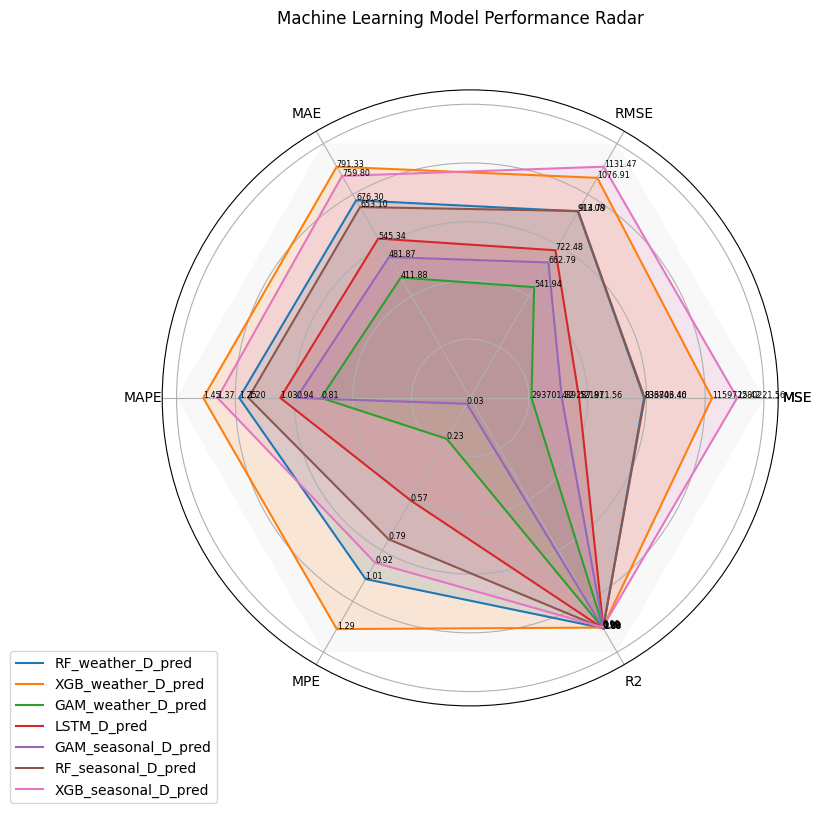

In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

def spider(df, *, id_column, title=None, max_values=None, padding=1.25):
    categories = df._get_numeric_data().columns.tolist()
    data = df[categories].to_dict(orient='list')
    ids = df[id_column].tolist()
    if max_values is None:
        max_values = {key: padding*max(value) for key, value in data.items()}
        
    normalized_data = {key: np.array(value) / max_values[key] for key, value in data.items()}
    num_vars = len(data.keys())
    tiks = list(data.keys())
    tiks += tiks[:1]
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist() + [0]
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    for i, model_name in enumerate(ids):
        values = [normalized_data[key][i] for key in data.keys()]
        actual_values = [data[key][i] for key in data.keys()]
        values += values[:1]  # Close the plot for a better look
        ax.plot(angles, values, label=model_name)
        ax.fill(angles, values, alpha=0.15)
        for _x, _y, t in zip(angles, values, actual_values):
            t = f'{t:.2f}' if isinstance(t, float) else str(t)
            ax.text(_x, _y, t, size='xx-small')
            
    ax.fill(angles, np.ones(num_vars + 1), alpha=0.05)
    ax.set_yticklabels([])
    ax.set_xticks(angles)
    ax.set_xticklabels(tiks)
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    if title is not None: plt.suptitle(title)
    plt.show()

# Define the data
data = {
    'Model': ['RF_weather_D_pred', 'XGB_weather_D_pred', 'GAM_weather_D_pred', 'LSTM_D_pred', 
              'GAM_seasonal_D_pred', 'RF_seasonal_D_pred', 'XGB_seasonal_D_pred'],
    'MSE': [833706.3999, 1159725.418, 293701.3174, 521971.5566, 439287.808, 836843.4593, 1280221.56],
    'RMSE': [913.0752433, 1076.905483, 541.9421716, 722.4759903, 662.7879058, 914.791484, 1131.468762],
    'MAE': [676.2996588, 791.3306802, 411.8775556, 545.3431616, 481.8680829, 653.1032492, 759.7957245],
    'MAPE': [1.252341821, 1.447378015, 0.80880668, 1.029626364, 0.942160254, 1.202525162, 1.370060304],
    'MPE': [1.012506613, 1.292012574, 0.228397537, 0.574099555, 0.033016666, 0.790100485, 0.921049338],
    'R2': [0.993733702, 0.991283281, 0.997792484, 0.996076761, 0.996698228, 0.993710124, 0.990377609]
}

# Create DataFrame
df = pd.DataFrame(data)

# Call the spider function with the data
spider(
    df,
    id_column='Model',
    title='Machine Learning Model Performance Radar',
    padding=1.1
)


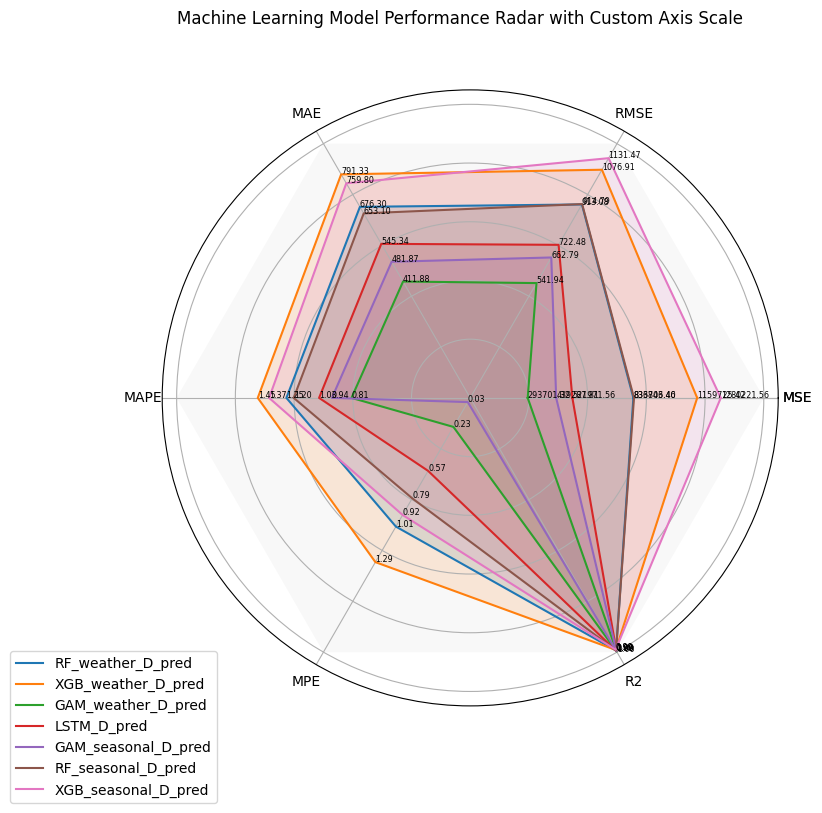

In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

def spider(df, *, id_column, title=None, max_values=None, axis_scale=None, padding=1.25):
    categories = df._get_numeric_data().columns.tolist()
    data = df[categories].to_dict(orient='list')
    ids = df[id_column].tolist()
    
    # If axis_scale is provided, use those values; otherwise, calculate max_values
    if axis_scale is not None:
        max_values = axis_scale
    elif max_values is None:
        max_values = {key: padding*max(value) for key, value in data.items()}
    
    normalized_data = {key: np.array(value) / max_values[key] for key, value in data.items()}
    num_vars = len(data.keys())
    tiks = list(data.keys())
    tiks += tiks[:1]
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist() + [0]
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    
    for i, model_name in enumerate(ids):
        values = [normalized_data[key][i] for key in data.keys()]
        actual_values = [data[key][i] for key in data.keys()]
        values += values[:1]  # Close the plot for a better look
        ax.plot(angles, values, label=model_name)
        ax.fill(angles, values, alpha=0.15)
        
        # Add actual values to the plot
        for _x, _y, t in zip(angles, values, actual_values):
            t = f'{t:.2f}' if isinstance(t, float) else str(t)
            ax.text(_x, _y, t, size='xx-small')
    
    # Add scale limits and labels
    ax.fill(angles, np.ones(num_vars + 1), alpha=0.05)
    ax.set_yticklabels([])
    ax.set_xticks(angles)
    ax.set_xticklabels(tiks)
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    
    if title is not None: 
        plt.suptitle(title)
    plt.show()

# Define the data
data = {
    'Model': ['RF_weather_D_pred', 'XGB_weather_D_pred', 'GAM_weather_D_pred', 'LSTM_D_pred', 
              'GAM_seasonal_D_pred', 'RF_seasonal_D_pred', 'XGB_seasonal_D_pred'],
    'MSE': [833706.3999, 1159725.418, 293701.3174, 521971.5566, 439287.808, 836843.4593, 1280221.56],
    'RMSE': [913.0752433, 1076.905483, 541.9421716, 722.4759903, 662.7879058, 914.791484, 1131.468762],
    'MAE': [676.2996588, 791.3306802, 411.8775556, 545.3431616, 481.8680829, 653.1032492, 759.7957245],
    'MAPE': [1.252341821, 1.447378015, 0.80880668, 1.029626364, 0.942160254, 1.202525162, 1.370060304],
    'MPE': [1.012506613, 1.292012574, 0.228397537, 0.574099555, 0.033016666, 0.790100485, 0.921049338],
    'R2': [0.993733702, 0.991283281, 0.997792484, 0.996076761, 0.996698228, 0.993710124, 0.990377609]
}

# Create DataFrame
df = pd.DataFrame(data)

# Define axis scale (for example, we can provide a fixed scale for each metric)
axis_scale = {
    'MSE': 1500000,
    'RMSE': 1200,
    'MAE': 900,
    'MAPE': 2.0,
    'MPE': 2.0,
    'R2': 1.0
}

# Call the spider function with the axis_scale input
spider(
    df,
    id_column='Model',
    title='Machine Learning Model Performance Radar with Custom Axis Scale',
    axis_scale=axis_scale,
    padding=1.1
)


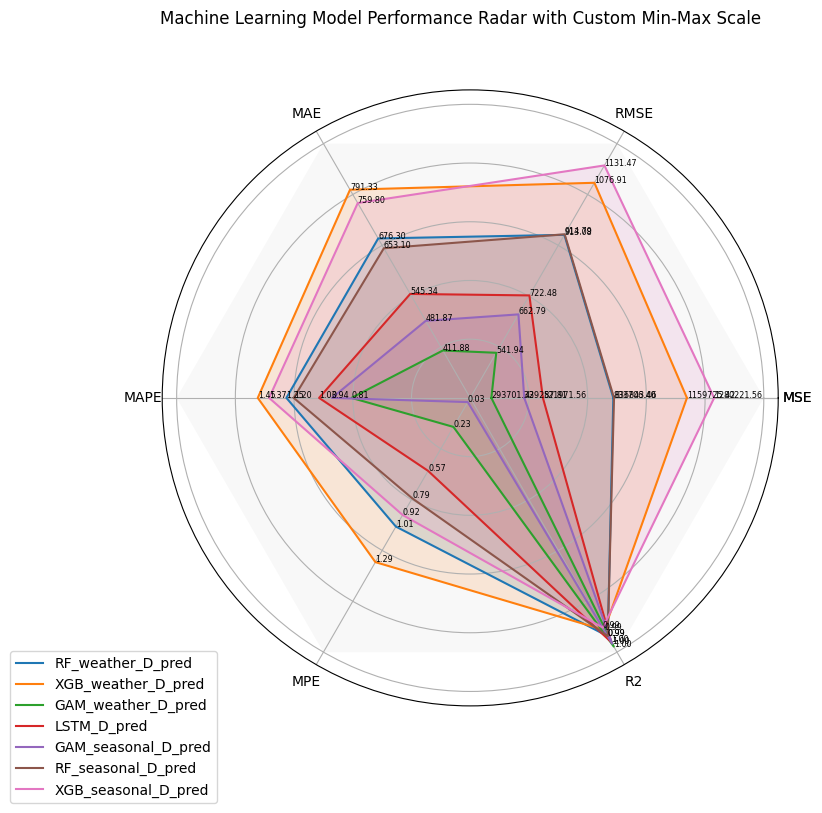

In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

def spider(df, *, id_column, title=None, axis_scale=None, padding=1.25):
    categories = df._get_numeric_data().columns.tolist()
    data = df[categories].to_dict(orient='list')
    ids = df[id_column].tolist()
    
    if axis_scale is None:
        raise ValueError("axis_scale must be provided with both minimum and maximum values for each category.")
    
    # Normalize the data based on provided min and max values for each category
    normalized_data = {}
    for key in data.keys():
        min_val, max_val = axis_scale[key]
        normalized_data[key] = (np.array(data[key]) - min_val) / (max_val - min_val)
    
    num_vars = len(data.keys())
    tiks = list(data.keys())
    tiks += tiks[:1]
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist() + [0]
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    
    for i, model_name in enumerate(ids):
        values = [normalized_data[key][i] for key in data.keys()]
        actual_values = [data[key][i] for key in data.keys()]
        values += values[:1]  # Close the plot for a better look
        ax.plot(angles, values, label=model_name)
        ax.fill(angles, values, alpha=0.15)
        
        # Add actual values to the plot
        for _x, _y, t in zip(angles, values, actual_values):
            t = f'{t:.2f}' if isinstance(t, float) else str(t)
            ax.text(_x, _y, t, size='xx-small')
    
    # Add scale limits and labels
    ax.fill(angles, np.ones(num_vars + 1), alpha=0.05)
    ax.set_yticklabels([])
    ax.set_xticks(angles)
    ax.set_xticklabels(tiks)
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    
    if title is not None: 
        plt.suptitle(title)
    plt.show()

# Define the data
data = {
    'Model': ['RF_weather_D_pred', 'XGB_weather_D_pred', 'GAM_weather_D_pred', 'LSTM_D_pred', 
              'GAM_seasonal_D_pred', 'RF_seasonal_D_pred', 'XGB_seasonal_D_pred'],
    'MSE': [833706.3999, 1159725.418, 293701.3174, 521971.5566, 439287.808, 836843.4593, 1280221.56],
    'RMSE': [913.0752433, 1076.905483, 541.9421716, 722.4759903, 662.7879058, 914.791484, 1131.468762],
    'MAE': [676.2996588, 791.3306802, 411.8775556, 545.3431616, 481.8680829, 653.1032492, 759.7957245],
    'MAPE': [1.252341821, 1.447378015, 0.80880668, 1.029626364, 0.942160254, 1.202525162, 1.370060304],
    'MPE': [1.012506613, 1.292012574, 0.228397537, 0.574099555, 0.033016666, 0.790100485, 0.921049338],
    'R2': [0.993733702, 0.991283281, 0.997792484, 0.996076761, 0.996698228, 0.993710124, 0.990377609]
}

# Create DataFrame
df = pd.DataFrame(data)

# Define axis scale with min and max values for each metric
axis_scale = {
    'MSE': (200000, 1500000),   # (min, max)
    'RMSE': (400, 1200),        # (min, max)
    'MAE': (300, 900),          # (min, max)
    'MAPE': (0, 2),             # (min, max)
    'MPE': (0, 2),              # (min, max)
    'R2': (0.9, 1)              # (min, max)
}

# Call the spider function with custom axis scale
spider(
    df,
    id_column='Model',
    title='Machine Learning Model Performance Radar with Custom Min-Max Scale',
    axis_scale=axis_scale,
    padding=1.1
)


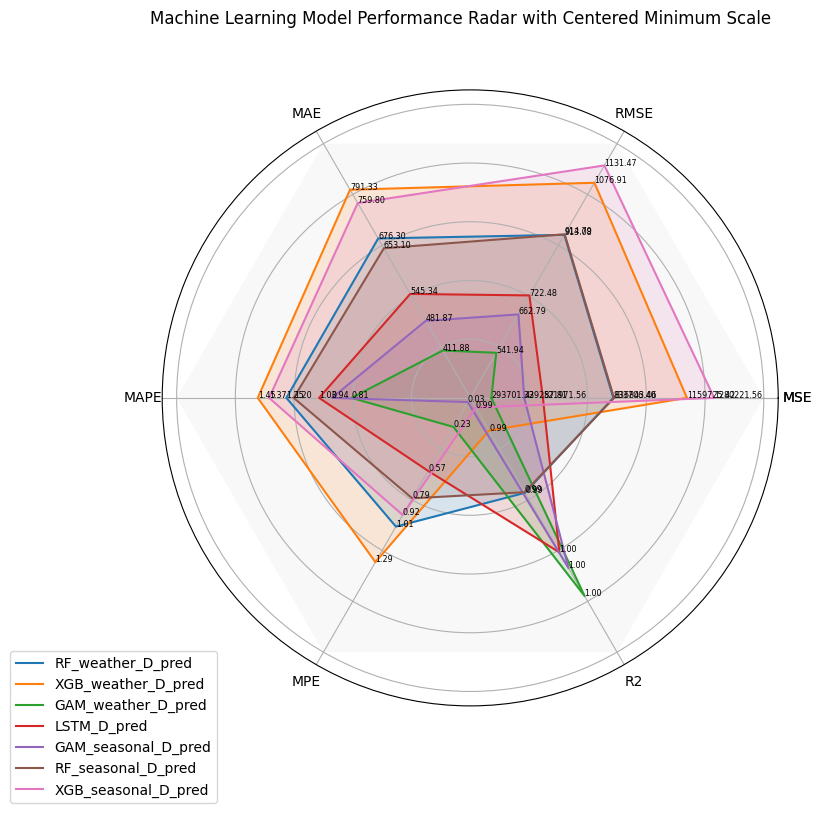

In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

def spider(df, *, id_column, title=None, axis_scale=None, padding=1.25):
    categories = df._get_numeric_data().columns.tolist()
    data = df[categories].to_dict(orient='list')
    ids = df[id_column].tolist()
    
    if axis_scale is None:
        raise ValueError("axis_scale must be provided with both minimum and maximum values for each category.")
    
    # Normalize the data based on provided min and max values for each category
    normalized_data = {}
    for key in data.keys():
        min_val, max_val = axis_scale[key]
        # Normalize to range [0, 1] based on the min value being at the center
        normalized_data[key] = (np.array(data[key]) - min_val) / (max_val - min_val)
    
    num_vars = len(data.keys())
    tiks = list(data.keys())
    tiks += tiks[:1]
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist() + [0]
    
    # Create a polar plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    
    for i, model_name in enumerate(ids):
        values = [normalized_data[key][i] for key in data.keys()]
        actual_values = [data[key][i] for key in data.keys()]
        values += values[:1]  # Close the plot for a better look
        ax.plot(angles, values, label=model_name)
        ax.fill(angles, values, alpha=0.15)
        
        # Add actual values to the plot
        for _x, _y, t in zip(angles, values, actual_values):
            t = f'{t:.2f}' if isinstance(t, float) else str(t)
            ax.text(_x, _y, t, size='xx-small')
    
    # Add scale limits and labels
    ax.fill(angles, np.ones(num_vars + 1), alpha=0.05)
    ax.set_yticklabels([])
    
    # Set custom ticks for the axes
    # y_ticks = np.linspace(0, 1, num=5)  # Create 5 ticks from 0 to 1
    # y_tick_labels = [f"{min_val + (max_val - min_val) * tick:.2f}" for tick in y_ticks]
    # ax.set_yticks(y_ticks)
    # ax.set_yticklabels(y_tick_labels)
    
    ax.set_xticks(angles)
    ax.set_xticklabels(tiks)
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    
    if title is not None: 
        plt.suptitle(title)
    plt.show()

# Define the data
data = {
    'Model': ['RF_weather_D_pred', 'XGB_weather_D_pred', 'GAM_weather_D_pred', 'LSTM_D_pred', 
              'GAM_seasonal_D_pred', 'RF_seasonal_D_pred', 'XGB_seasonal_D_pred'],
    'MSE': [833706.3999, 1159725.418, 293701.3174, 521971.5566, 439287.808, 836843.4593, 1280221.56],
    'RMSE': [913.0752433, 1076.905483, 541.9421716, 722.4759903, 662.7879058, 914.791484, 1131.468762],
    'MAE': [676.2996588, 791.3306802, 411.8775556, 545.3431616, 481.8680829, 653.1032492, 759.7957245],
    'MAPE': [1.252341821, 1.447378015, 0.80880668, 1.029626364, 0.942160254, 1.202525162, 1.370060304],
    'MPE': [1.012506613, 1.292012574, 0.228397537, 0.574099555, 0.033016666, 0.790100485, 0.921049338],
    'R2': [0.993733702, 0.991283281, 0.997792484, 0.996076761, 0.996698228, 0.993710124, 0.990377609]
}

# Create DataFrame
df = pd.DataFrame(data)

# Define axis scale with min and max values for each metric
axis_scale = {
    'MSE': (200000, 1500000),   # (min, max)
    'RMSE': (400, 1200),        # (min, max)
    'MAE': (300, 900),          # (min, max)
    'MAPE': (0, 2),             # (min, max)
    'MPE': (0, 2),              # (min, max)
    'R2': (0.99, 1)              # (min, max)
}

# Call the spider function with custom axis scale
spider(
    df,
    id_column='Model',
    title='Machine Learning Model Performance Radar with Centered Minimum Scale',
    axis_scale=axis_scale,
    padding=1.1
)


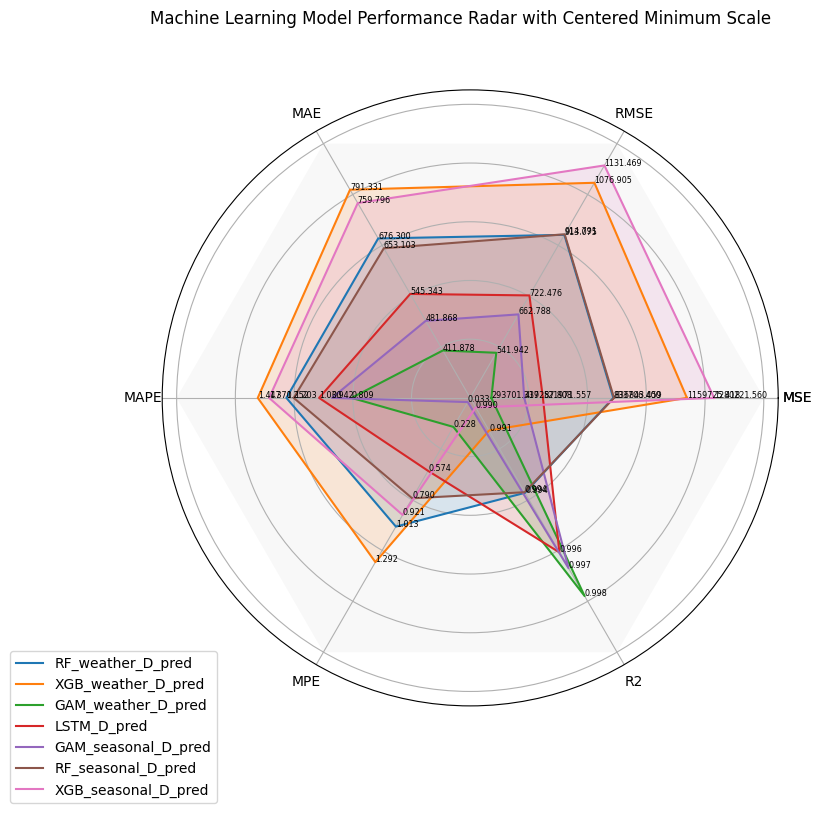

In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

def spider(df, *, id_column, title=None, axis_scale=None, decimal_places=2, padding=1.25):
    categories = df._get_numeric_data().columns.tolist()
    data = df[categories].to_dict(orient='list')
    ids = df[id_column].tolist()
    
    if axis_scale is None:
        raise ValueError("axis_scale must be provided with both minimum and maximum values for each category.")
    
    # Normalize the data based on provided min and max values for each category
    normalized_data = {}
    for key in data.keys():
        min_val, max_val = axis_scale[key]
        # Normalize to range [0, 1] based on the min value being at the center
        normalized_data[key] = (np.array(data[key]) - min_val) / (max_val - min_val)
    
    num_vars = len(data.keys())
    tiks = list(data.keys())
    tiks += tiks[:1]
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist() + [0]
    
    # Create a polar plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    
    for i, model_name in enumerate(ids):
        values = [normalized_data[key][i] for key in data.keys()]
        actual_values = [data[key][i] for key in data.keys()]
        values += values[:1]  # Close the plot for a better look
        ax.plot(angles, values, label=model_name)
        ax.fill(angles, values, alpha=0.15)
        
        # Add actual values to the plot with specified decimal places
        for _x, _y, t in zip(angles, values, actual_values):
            t = f'{t:.{decimal_places}f}' if isinstance(t, float) else str(t)
            ax.text(_x, _y, t, size='xx-small')
    
    # Add scale limits and labels
    ax.fill(angles, np.ones(num_vars + 1), alpha=0.05)
    ax.set_yticklabels([])
    
    
    ax.set_xticks(angles)
    ax.set_xticklabels(tiks)
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    
    if title is not None: 
        plt.suptitle(title)
    plt.show()

# Define the data
data = {
    'Model': ['RF_weather_D_pred', 'XGB_weather_D_pred', 'GAM_weather_D_pred', 'LSTM_D_pred', 
              'GAM_seasonal_D_pred', 'RF_seasonal_D_pred', 'XGB_seasonal_D_pred'],
    'MSE': [833706.3999, 1159725.418, 293701.3174, 521971.5566, 439287.808, 836843.4593, 1280221.56],
    'RMSE': [913.0752433, 1076.905483, 541.9421716, 722.4759903, 662.7879058, 914.791484, 1131.468762],
    'MAE': [676.2996588, 791.3306802, 411.8775556, 545.3431616, 481.8680829, 653.1032492, 759.7957245],
    'MAPE': [1.252341821, 1.447378015, 0.80880668, 1.029626364, 0.942160254, 1.202525162, 1.370060304],
    'MPE': [1.012506613, 1.292012574, 0.228397537, 0.574099555, 0.033016666, 0.790100485, 0.921049338],
    'R2': [0.993733702, 0.991283281, 0.997792484, 0.996076761, 0.996698228, 0.993710124, 0.990377609]
}

# Create DataFrame
df = pd.DataFrame(data)

# Define axis scale with min and max values for each metric
axis_scale = {
    'MSE': (200000, 1500000),   # (min, max)
    'RMSE': (400, 1200),        # (min, max)
    'MAE': (300, 900),          # (min, max)
    'MAPE': (0, 2),             # (min, max)
    'MPE': (0, 2),              # (min, max)
    'R2': (0.99, 1)             # (min, max)
}

# Call the spider function with custom axis scale and dynamic decimal places
spider(
    df,
    id_column='Model',
    title='Machine Learning Model Performance Radar with Centered Minimum Scale',
    axis_scale=axis_scale,
    decimal_places=3,  # Specify the number of decimal places here
    padding=1.1
)


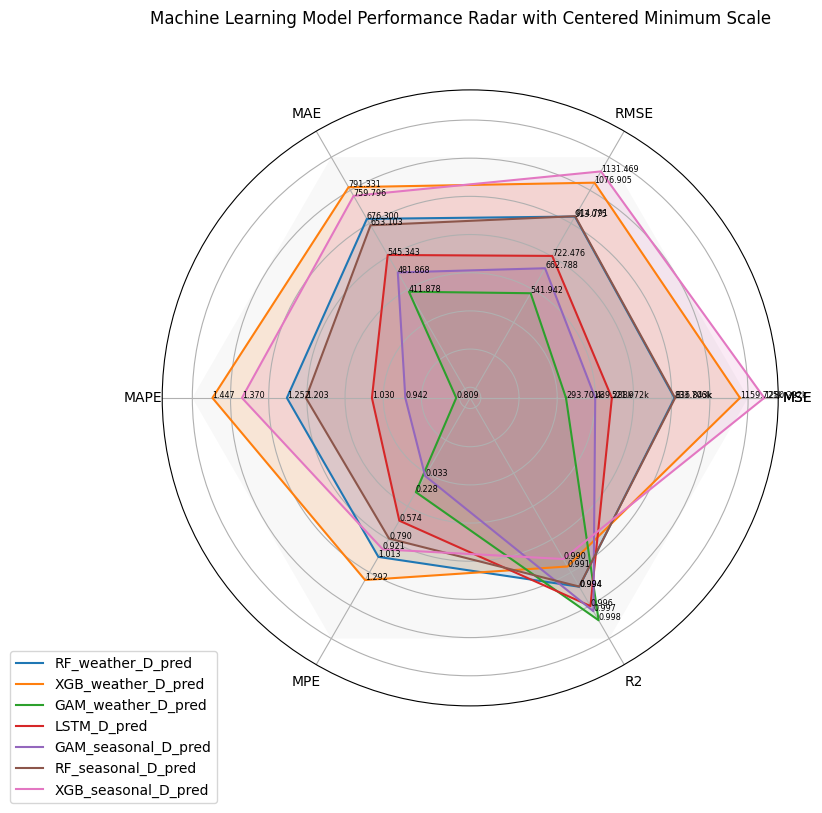

In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

def spider(df, *, id_column, title=None, axis_scale=None, decimal_places=None, padding=1.25):
    categories = df._get_numeric_data().columns.tolist()
    data = df[categories].to_dict(orient='list')
    ids = df[id_column].tolist()
    
    if axis_scale is None:
        raise ValueError("axis_scale must be provided with both minimum and maximum values for each category.")
    
    # Normalize the data based on provided min and max values for each category
    normalized_data = {}
    for key in data.keys():
        min_val, max_val = axis_scale[key]
        # Normalize to range [0, 1] based on the min value being at the center
        normalized_data[key] = (np.array(data[key]) - min_val) / (max_val - min_val)
    
    num_vars = len(data.keys())
    tiks = list(data.keys())
    tiks += tiks[:1]
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist() + [0]
    
    # Create a polar plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    
    for i, model_name in enumerate(ids):
        values = [normalized_data[key][i] for key in data.keys()]
        actual_values = [data[key][i] for key in data.keys()]
        values += values[:1]  # Close the plot for a better look
        ax.plot(angles, values, label=model_name)
        ax.fill(angles, values, alpha=0.15)
        
        # Add actual values to the plot with specified decimal places and formatting
        for _x, _y, t in zip(angles, values, actual_values):
            # Format number to show "k" for thousands
            if t > 10000:
                t = f'{t / 1000:.{decimal_places[key]}f}k'
            else:
                if decimal_places and key in decimal_places:
                    t = f'{t:.{decimal_places[key]}f}' if isinstance(t, float) else str(t)
                else:
                    t = f'{t:.2f}' if isinstance(t, float) else str(t)
            ax.text(_x, _y, t, size='xx-small')
    
    # Add scale limits and labels
    ax.fill(angles, np.ones(num_vars + 1), alpha=0.05)
    ax.set_yticklabels([])
    
    ax.set_xticks(angles)
    ax.set_xticklabels(tiks)
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    
    if title is not None: 
        plt.suptitle(title)
    plt.show()

# Define the data
data = {
    'Model': ['RF_weather_D_pred', 'XGB_weather_D_pred', 'GAM_weather_D_pred', 'LSTM_D_pred', 
              'GAM_seasonal_D_pred', 'RF_seasonal_D_pred', 'XGB_seasonal_D_pred'],
    'MSE': [833706.3999, 1159725.418, 293701.3174, 521971.5566, 439287.808, 836843.4593, 1280221.56],
    'RMSE': [913.0752433, 1076.905483, 541.9421716, 722.4759903, 662.7879058, 914.791484, 1131.468762],
    'MAE': [676.2996588, 791.3306802, 411.8775556, 545.3431616, 481.8680829, 653.1032492, 759.7957245],
    'MAPE': [1.252341821, 1.447378015, 0.80880668, 1.029626364, 0.942160254, 1.202525162, 1.370060304],
    'MPE': [1.012506613, 1.292012574, 0.228397537, 0.574099555, 0.033016666, 0.790100485, 0.921049338],
    'R2': [0.993733702, 0.991283281, 0.997792484, 0.996076761, 0.996698228, 0.993710124, 0.990377609]
}

# Create DataFrame
df = pd.DataFrame(data)

# Define axis scale with min and max values for each metric
axis_scale = {
    'MSE': (250000, 1200000),   # (min, max)
    'RMSE': (400, 1200),        # (min, max)
    'MAE': (300, 900),          # (min, max)
    'MAPE': (1, 1.5),             # (min, max)
    'MPE': (0, 2),              # (min, max)
    'R2': (0.98, 1)             # (min, max)
}

# Define decimal places for each scale
decimal_places = {
    'MSE': 0,
    'RMSE': 0,
    'MAE': 0,
    'MAPE': 2,
    'MPE': 2,
    'R2': 3
}

# Call the spider function with custom axis scale and dynamic decimal places
spider(
    df,
    id_column='Model',
    title='Machine Learning Model Performance Radar with Centered Minimum Scale',
    axis_scale=axis_scale,
    decimal_places=decimal_places,  # Specify decimal places for each metric
    padding=1.1
)


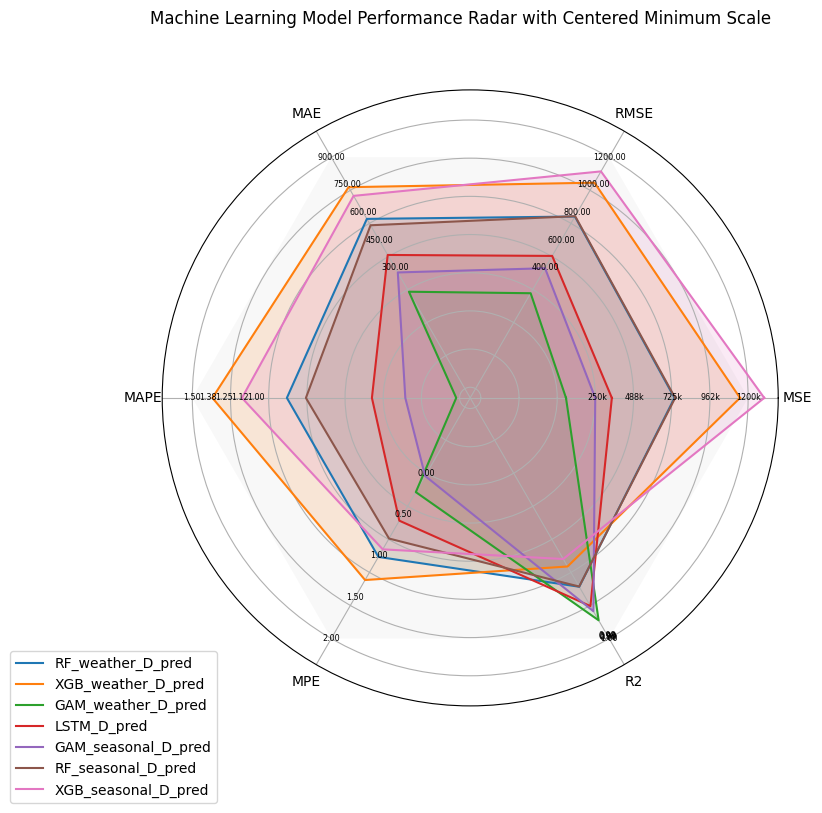

In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

def spider(df, *, id_column, title=None, axis_scale=None, padding=1.25):
    categories = df._get_numeric_data().columns.tolist()
    data = df[categories].to_dict(orient='list')
    ids = df[id_column].tolist()
    
    if axis_scale is None:
        raise ValueError("axis_scale must be provided with both minimum and maximum values for each category.")
    
    # Normalize the data based on provided min and max values for each category
    normalized_data = {}
    for key in data.keys():
        min_val, max_val = axis_scale[key]
        # Normalize to range [0, 1] based on the min value being at the center
        normalized_data[key] = (np.array(data[key]) - min_val) / (max_val - min_val)
    
    num_vars = len(data.keys())
    tiks = list(data.keys())
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    
    # Close the plot for a better look
    angles += angles[:1]
    
    # Create a polar plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    
    for i, model_name in enumerate(ids):
        values = [normalized_data[key][i] for key in data.keys()]
        values += values[:1]  # Close the plot for a better look
        ax.plot(angles, values, label=model_name)
        ax.fill(angles, values, alpha=0.15)
    
    # Add scale limits and labels
    ax.fill(angles, np.ones(num_vars + 1), alpha=0.05)
    ax.set_yticklabels([])  # Clear y-tick labels since we will set our own

    # Set custom ticks and labels for each axis
    for i, key in enumerate(data.keys()):
        min_val, max_val = axis_scale[key]
        # Calculate 5 equally spaced values between min and max
        ticks = np.linspace(min_val, max_val, 5)
        # Add labels to the radial axis
        for tick in ticks:
            # Format number to show "k" for thousands
            if tick > 10000:
                tick_label = f'{tick / 1000:.0f}k'
            else:
                tick_label = f'{tick:.2f}'
            angle = angles[i]
            ax.text(angle, tick / max_val, tick_label, ha='center', va='center', size='xx-small')

    # Set x-ticks and labels for each axis
    ax.set_xticks(angles[:-1])  # Set x-ticks without the last duplicate
    ax.set_xticklabels(tiks)  # Set labels for each category (same number as angles[:-1])
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    
    if title is not None: 
        plt.suptitle(title)
    plt.show()

# Define the data
data = {
    'Model': ['RF_weather_D_pred', 'XGB_weather_D_pred', 'GAM_weather_D_pred', 'LSTM_D_pred', 
              'GAM_seasonal_D_pred', 'RF_seasonal_D_pred', 'XGB_seasonal_D_pred'],
    'MSE': [833706.3999, 1159725.418, 293701.3174, 521971.5566, 439287.808, 836843.4593, 1280221.56],
    'RMSE': [913.0752433, 1076.905483, 541.9421716, 722.4759903, 662.7879058, 914.791484, 1131.468762],
    'MAE': [676.2996588, 791.3306802, 411.8775556, 545.3431616, 481.8680829, 653.1032492, 759.7957245],
    'MAPE': [1.252341821, 1.447378015, 0.80880668, 1.029626364, 0.942160254, 1.202525162, 1.370060304],
    'MPE': [1.012506613, 1.292012574, 0.228397537, 0.574099555, 0.033016666, 0.790100485, 0.921049338],
    'R2': [0.993733702, 0.991283281, 0.997792484, 0.996076761, 0.996698228, 0.993710124, 0.990377609]
}

# Create DataFrame
df = pd.DataFrame(data)

# Define axis scale with min and max values for each metric
axis_scale = {
    'MSE': (250000, 1200000),   # (min, max)
    'RMSE': (400, 1200),        # (min, max)
    'MAE': (300, 900),          # (min, max)
    'MAPE': (1, 1.5),           # (min, max)
    'MPE': (0, 2),              # (min, max)
    'R2': (0.98, 1)             # (min, max)
}

# Define decimal places for each scale
decimal_places = {
    'MSE': 0,
    'RMSE': 0,
    'MAE': 0,
    'MAPE': 2,
    'MPE': 2,
    'R2': 3
}

# Call the spider function with custom axis scale and dynamic decimal places
spider(
    df,
    id_column='Model',
    title='Machine Learning Model Performance Radar with Centered Minimum Scale',
    axis_scale=axis_scale,
    # decimal_places=decimal_places,  # Specify decimal places for each metric
    padding=1.1
)


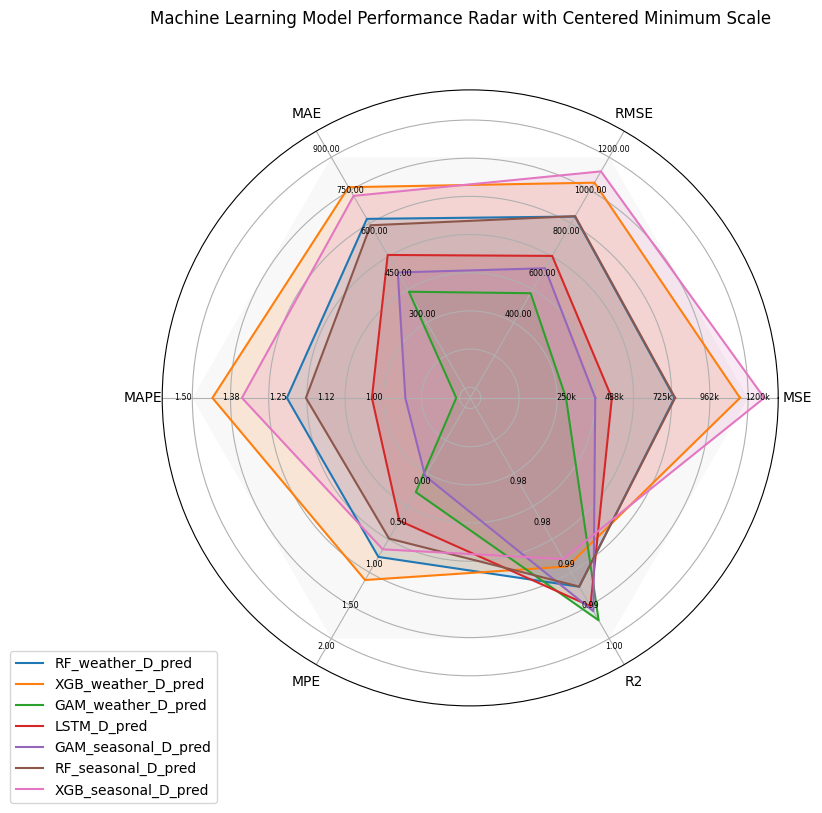

In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

def spider(df, *, id_column, title=None, axis_scale=None, padding=1.25):
    categories = df._get_numeric_data().columns.tolist()
    data = df[categories].to_dict(orient='list')
    ids = df[id_column].tolist()
    
    if axis_scale is None:
        raise ValueError("axis_scale must be provided with both minimum and maximum values for each category.")
    
    # Normalize the data based on provided min and max values for each category
    normalized_data = {}
    for key in data.keys():
        min_val, max_val = axis_scale[key]
        # Normalize to range [0, 1] based on the min value being at the center
        normalized_data[key] = (np.array(data[key]) - min_val) / (max_val - min_val)
    
    num_vars = len(data.keys())
    tiks = list(data.keys())
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    
    # Close the plot for a better look
    angles += angles[:1]
    
    # Create a polar plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    
    for i, model_name in enumerate(ids):
        values = [normalized_data[key][i] for key in data.keys()]
        values += values[:1]  # Close the plot for a better look
        ax.plot(angles, values, label=model_name)
        ax.fill(angles, values, alpha=0.15)
    
    # Add scale limits and labels
    ax.fill(angles, np.ones(num_vars + 1), alpha=0.05)
    ax.set_yticklabels([])  # Clear y-tick labels since we will set our own

    # Set custom ticks and labels for each axis
    for i, key in enumerate(data.keys()):
        min_val, max_val = axis_scale[key]
        # Calculate 5 equally spaced values between min and max
        ticks = np.linspace(min_val, max_val, 5)
        # Add labels to the radial axis
        for tick in ticks:
            # Normalize tick for position on the radar
            normalized_tick = (tick - min_val) / (max_val - min_val)
            # Format number to show "k" for thousands
            if tick > 10000:
                tick_label = f'{tick / 1000:.0f}k'
            else:
                tick_label = f'{tick:.2f}'
            angle = angles[i]
            ax.text(angle, normalized_tick + 0.05, tick_label, ha='center', va='center', size='xx-small')  # Offset for visibility

    # Set x-ticks and labels for each axis
    ax.set_xticks(angles[:-1])  # Set x-ticks without the last duplicate
    ax.set_xticklabels(tiks)  # Set labels for each category (same number as angles[:-1])
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    
    if title is not None: 
        plt.suptitle(title)
    plt.show()

# Define the data
data = {
    'Model': ['RF_weather_D_pred', 'XGB_weather_D_pred', 'GAM_weather_D_pred', 'LSTM_D_pred', 
              'GAM_seasonal_D_pred', 'RF_seasonal_D_pred', 'XGB_seasonal_D_pred'],
    'MSE': [833706.3999, 1159725.418, 293701.3174, 521971.5566, 439287.808, 836843.4593, 1280221.56],
    'RMSE': [913.0752433, 1076.905483, 541.9421716, 722.4759903, 662.7879058, 914.791484, 1131.468762],
    'MAE': [676.2996588, 791.3306802, 411.8775556, 545.3431616, 481.8680829, 653.1032492, 759.7957245],
    'MAPE': [1.252341821, 1.447378015, 0.80880668, 1.029626364, 0.942160254, 1.202525162, 1.370060304],
    'MPE': [1.012506613, 1.292012574, 0.228397537, 0.574099555, 0.033016666, 0.790100485, 0.921049338],
    'R2': [0.993733702, 0.991283281, 0.997792484, 0.996076761, 0.996698228, 0.993710124, 0.990377609]
}

# Create DataFrame
df = pd.DataFrame(data)

# Define axis scale with min and max values for each metric
axis_scale = {
    'MSE': (250000, 1200000),   # (min, max)
    'RMSE': (400, 1200),        # (min, max)
    'MAE': (300, 900),          # (min, max)
    'MAPE': (1, 1.5),           # (min, max)
    'MPE': (0, 2),              # (min, max)
    'R2': (0.98, 1)             # (min, max)
}

# Define decimal places for each scale
decimal_places = {
    'MSE': 0,
    'RMSE': 0,
    'MAE': 0,
    'MAPE': 2,
    'MPE': 2,
    'R2': 3
}

# Call the spider function with custom axis scale and dynamic decimal places
spider(
    df,
    id_column='Model',
    title='Machine Learning Model Performance Radar with Centered Minimum Scale',
    axis_scale=axis_scale,
    # decimal_places=decimal_places,  # Specify decimal places for each metric
    padding=1.1
)


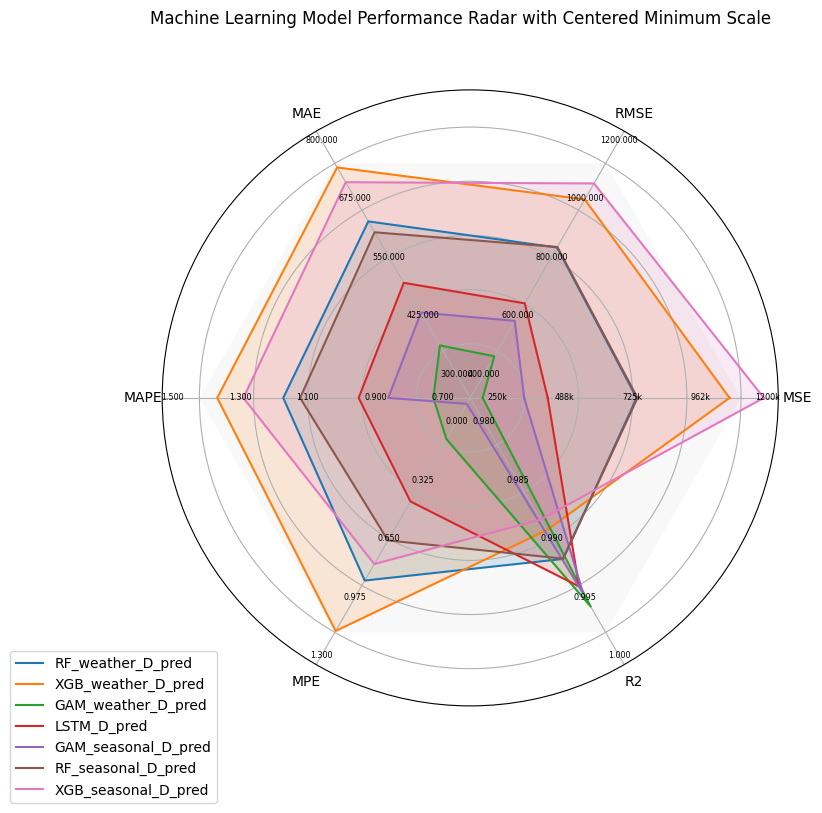

In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

def spider(df, *, id_column, title=None, axis_scale=None, padding=1.25):
    categories = df._get_numeric_data().columns.tolist()
    data = df[categories].to_dict(orient='list')
    ids = df[id_column].tolist()
    
    if axis_scale is None:
        raise ValueError("axis_scale must be provided with both minimum and maximum values for each category.")
    
    # Normalize the data based on provided min and max values for each category
    normalized_data = {}
    for key in data.keys():
        min_val, max_val = axis_scale[key]
        # Normalize to range [0, 1] based on the min value being at the center
        normalized_data[key] = (np.array(data[key]) - min_val) / (max_val - min_val)
    
    num_vars = len(data.keys())
    tiks = list(data.keys())
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    
    # Close the plot for a better look
    angles += angles[:1]
    
    # Create a polar plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    
    for i, model_name in enumerate(ids):
        values = [normalized_data[key][i] for key in data.keys()]
        values += values[:1]  # Close the plot for a better look
        ax.plot(angles, values, label=model_name)
        ax.fill(angles, values, alpha=0.15)

    # Add scale limits and labels
    ax.fill(angles, np.ones(num_vars + 1), alpha=0.05)
    ax.set_yticklabels([])  # Clear y-tick labels since we will set our own

    # Set custom ticks and labels for each axis
    for i, key in enumerate(data.keys()):
        min_val, max_val = axis_scale[key]
        # Calculate 5 equally spaced values between min and max
        ticks = np.linspace(min_val, max_val, 5)
        # Add labels to the radial axis
        for tick in ticks:
            # Normalize the tick for positioning on the radar plot
            normalized_tick = (tick - min_val) / (max_val - min_val)
            # Format number to show "k" for thousands
            if tick > 10000:
                tick_label = f'{tick / 1000:.0f}k'
            else:
                tick_label = f'{tick:.3f}'
            angle = angles[i]
            
            # Adjust the position of the labels slightly outward
            offset = 0.1  # Change this value to increase/decrease the distance
            ax.text(angle, normalized_tick + offset, tick_label, ha='center', va='center', size='xx-small')

    # Set x-ticks and labels for each axis
    ax.set_xticks(angles[:-1])  # Set x-ticks without the last duplicate
    ax.set_xticklabels(tiks)  # Set labels for each category (same number as angles[:-1])
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    
    if title is not None: 
        plt.suptitle(title)
    plt.show()

# Define the data
data = {
    'Model': ['RF_weather_D_pred', 'XGB_weather_D_pred', 'GAM_weather_D_pred', 'LSTM_D_pred', 
              'GAM_seasonal_D_pred', 'RF_seasonal_D_pred', 'XGB_seasonal_D_pred'],
    'MSE': [833706.3999, 1159725.418, 293701.3174, 521971.5566, 439287.808, 836843.4593, 1280221.56],
    'RMSE': [913.0752433, 1076.905483, 541.9421716, 722.4759903, 662.7879058, 914.791484, 1131.468762],
    'MAE': [676.2996588, 791.3306802, 411.8775556, 545.3431616, 481.8680829, 653.1032492, 759.7957245],
    'MAPE': [1.252341821, 1.447378015, 0.80880668, 1.029626364, 0.942160254, 1.202525162, 1.370060304],
    'MPE': [1.012506613, 1.292012574, 0.228397537, 0.574099555, 0.033016666, 0.790100485, 0.921049338],
    'R2': [0.993733702, 0.991283281, 0.997792484, 0.996076761, 0.996698228, 0.993710124, 0.990377609]
}

# Create DataFrame
df = pd.DataFrame(data)

# Define axis scale with min and max values for each metric
axis_scale = {
    'MSE': (250000, 1200000),   # (min, max)
    'RMSE': (400, 1200),        # (min, max)
    'MAE': (300, 800),          # (min, max)
    'MAPE': (0.7, 1.5),        # (min, max)
    'MPE': (0, 1.3),           # (min, max)
    'R2': (0.98, 1)            # (min, max)
}

# Call the spider function with custom axis scale
spider(
    df,
    id_column='Model',
    title='Machine Learning Model Performance Radar with Centered Minimum Scale',
    axis_scale=axis_scale,
    padding=1.1
)


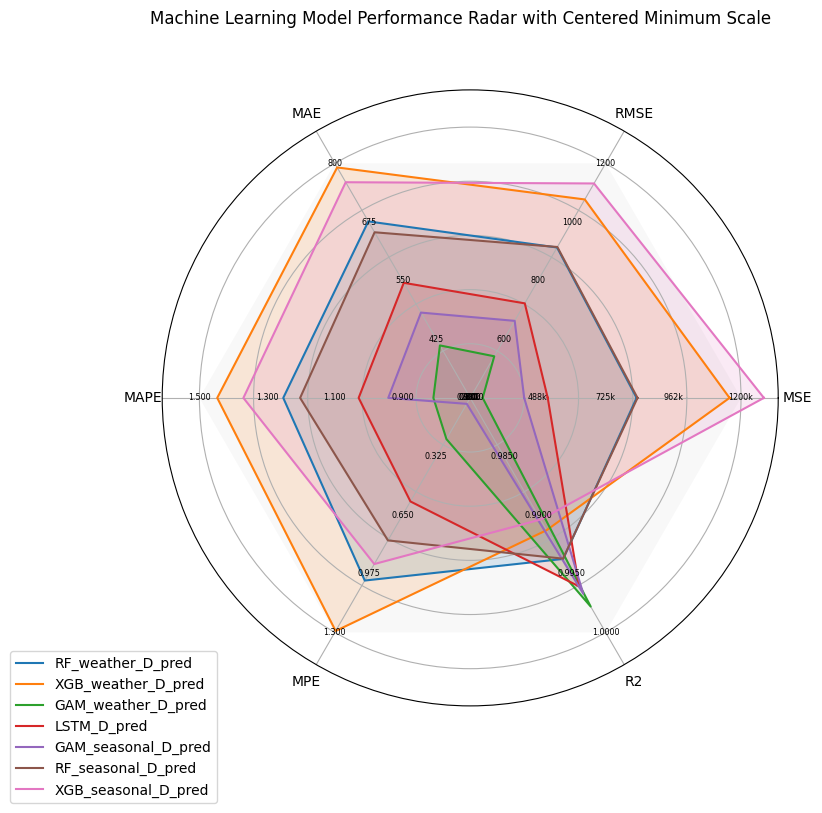

In [20]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

def spider(df, *, id_column, title=None, axis_scale=None, decimal_places=None, padding=1.25):
    categories = df._get_numeric_data().columns.tolist()
    data = df[categories].to_dict(orient='list')
    ids = df[id_column].tolist()
    
    if axis_scale is None:
        raise ValueError("axis_scale must be provided with both minimum and maximum values for each category.")
    
    if decimal_places is None:
        raise ValueError("decimal_places must be provided as a dictionary with the format {'metric_name': number_of_places}.")
    
    # Normalize the data based on provided min and max values for each category
    normalized_data = {}
    for key in data.keys():
        min_val, max_val = axis_scale[key]
        # Normalize to range [0, 1] based on the min value being at the center
        normalized_data[key] = (np.array(data[key]) - min_val) / (max_val - min_val)
    
    num_vars = len(data.keys())
    tiks = list(data.keys())
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    
    # Close the plot for a better look
    angles += angles[:1]
    
    # Create a polar plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    
    for i, model_name in enumerate(ids):
        values = [normalized_data[key][i] for key in data.keys()]
        values += values[:1]  # Close the plot for a better look
        ax.plot(angles, values, label=model_name)
        ax.fill(angles, values, alpha=0.15)

    # Add scale limits and labels
    ax.fill(angles, np.ones(num_vars + 1), alpha=0.05)
    ax.set_yticklabels([])  # Clear y-tick labels since we will set our own

    # Set custom ticks and labels for each axis
    for i, key in enumerate(data.keys()):
        min_val, max_val = axis_scale[key]
        # Calculate 5 equally spaced values between min and max
        ticks = np.linspace(min_val, max_val, 5)
        # Add labels to the radial axis
        for tick in ticks:
            # Normalize the tick for positioning on the radar plot
            normalized_tick = (tick - min_val) / (max_val - min_val)
            # Format number based on decimal places
            if tick > 10000:
                tick_label = f'{tick / 1000:.0f}k'
            else:
                decimal = decimal_places.get(key, 3)  # Default to 3 decimal places if not specified
                tick_label = f'{tick:.{decimal}f}'  # Format with specified decimal places
            
            angle = angles[i]
            # Adjust the position of the labels slightly outward
            offset = 0.0  # Change this value to increase/decrease the distance
            ax.text(angle, normalized_tick + offset, tick_label, ha='center', va='center', size='xx-small')

    # Set x-ticks and labels for each axis
    ax.set_xticks(angles[:-1])  # Set x-ticks without the last duplicate
    ax.set_xticklabels(tiks)  # Set labels for each category (same number as angles[:-1])
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    
    if title is not None: 
        plt.suptitle(title)
    plt.show()

# Define the data
data = {
    'Model': ['RF_weather_D_pred', 'XGB_weather_D_pred', 'GAM_weather_D_pred', 'LSTM_D_pred', 
              'GAM_seasonal_D_pred', 'RF_seasonal_D_pred', 'XGB_seasonal_D_pred'],
    'MSE': [833706.3999, 1159725.418, 293701.3174, 521971.5566, 439287.808, 836843.4593, 1280221.56],
    'RMSE': [913.0752433, 1076.905483, 541.9421716, 722.4759903, 662.7879058, 914.791484, 1131.468762],
    'MAE': [676.2996588, 791.3306802, 411.8775556, 545.3431616, 481.8680829, 653.1032492, 759.7957245],
    'MAPE': [1.252341821, 1.447378015, 0.80880668, 1.029626364, 0.942160254, 1.202525162, 1.370060304],
    'MPE': [1.012506613, 1.292012574, 0.228397537, 0.574099555, 0.033016666, 0.790100485, 0.921049338],
    'R2': [0.993733702, 0.991283281, 0.997792484, 0.996076761, 0.996698228, 0.993710124, 0.990377609]
}

# Create DataFrame
df = pd.DataFrame(data)

# Define axis scale with min and max values for each metric
axis_scale = {
    'MSE': (250000, 1200000),   # (min, max)
    'RMSE': (400, 1200),        # (min, max)
    'MAE': (300, 800),          # (min, max)
    'MAPE': (0.7, 1.5),         # (min, max)
    'MPE': (0, 1.3),            # (min, max)
    'R2': (0.98, 1)             # (min, max)
}

# Define decimal places for each metric
decimal_places = {
    'MSE': 0,
    'RMSE': 0,
    'MAE': 0,
    'MAPE': 3,
    'MPE': 3,
    'R2': 4
}

# Call the spider function with custom axis scale and decimal places
spider(
    df,
    id_column='Model',
    title='Machine Learning Model Performance Radar with Centered Minimum Scale',
    axis_scale=axis_scale,
    decimal_places=decimal_places,
    padding=1.1
)


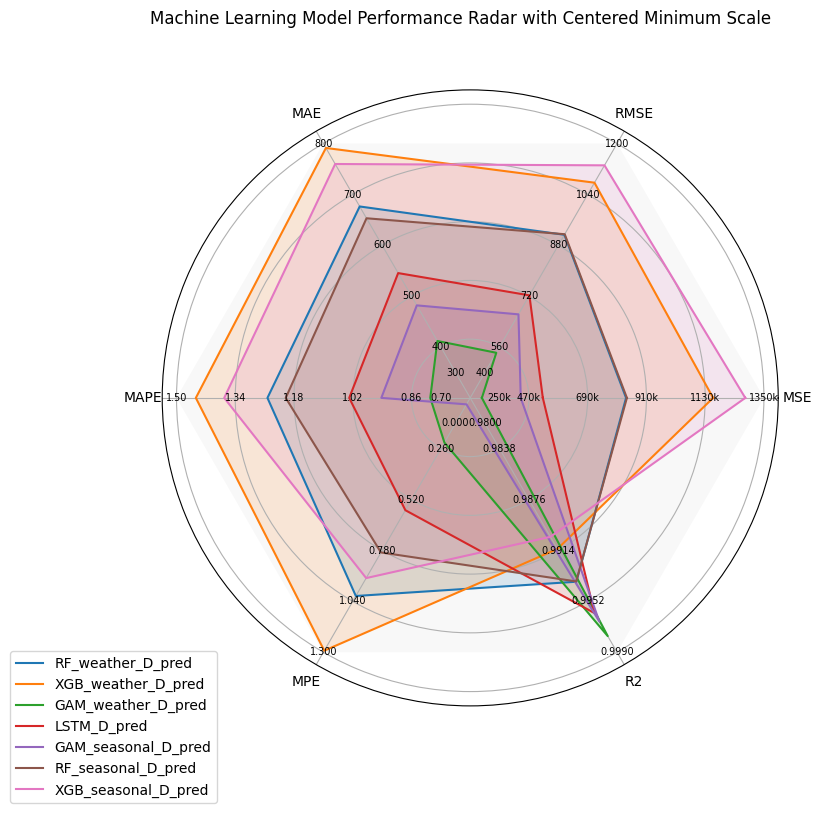

In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

def spider(df, *, id_column, title=None, axis_scale=None, decimal_places=None, padding=1.25):
    categories = df._get_numeric_data().columns.tolist()
    data = df[categories].to_dict(orient='list')
    ids = df[id_column].tolist()
    
    if axis_scale is None:
        raise ValueError("axis_scale must be provided with both minimum and maximum values for each category.")
    
    if decimal_places is None:
        raise ValueError("decimal_places must be provided as a dictionary with the format {'metric_name': number_of_places}.")
    
    # Normalize the data based on provided min and max values for each category
    normalized_data = {}
    for key in data.keys():
        min_val, max_val = axis_scale[key]
        # Normalize to range [0, 1] based on the min value being at the center
        normalized_data[key] = (np.array(data[key]) - min_val) / (max_val - min_val)
    
    num_vars = len(data.keys())
    tiks = list(data.keys())
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    
    # Close the plot for a better look
    angles += angles[:1]
    
    # Create a polar plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    
    for i, model_name in enumerate(ids):
        values = [normalized_data[key][i] for key in data.keys()]
        values += values[:1]  # Close the plot for a better look
        ax.plot(angles, values, label=model_name)
        ax.fill(angles, values, alpha=0.15)

    # Add scale limits and labels
    ax.fill(angles, np.ones(num_vars + 1), alpha=0.05)
    ax.set_yticklabels([])  # Clear y-tick labels since we will set our own

    # Set custom ticks and labels for each axis
    for i, key in enumerate(data.keys()):
        min_val, max_val = axis_scale[key]
        # Calculate 5 equally spaced values between min and max
        ticks = np.linspace(min_val, max_val, 6)
        # Add labels to the radial axis
        for tick in ticks:
            # Normalize the tick for positioning on the radar plot
            if tick == min_val:
                normalized_tick = (tick - min_val) / (max_val - min_val) + 0.1  # Offset only for minimum
            else:
                normalized_tick = (tick - min_val) / (max_val - min_val)  # No offset for other ticks
            
            # Format number based on decimal places
            if tick > 10000:
                tick_label = f'{tick / 1000:.0f}k'
            else:
                decimal = decimal_places.get(key, 3)  # Default to 3 decimal places if not specified
                tick_label = f'{tick:.{decimal}f}'  # Format with specified decimal places
            
            angle = angles[i]
            # Adjust the position of the labels slightly outward
            ax.text(angle, normalized_tick, tick_label, ha='center', va='center', size='x-small')

    # Set x-ticks and labels for each axis
    ax.set_xticks(angles[:-1])  # Set x-ticks without the last duplicate
    ax.set_xticklabels(tiks)  # Set labels for each category (same number as angles[:-1])
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    
    if title is not None: 
        plt.suptitle(title)
    plt.show()

# Define the data
data = {
    'Model': ['RF_weather_D_pred', 'XGB_weather_D_pred', 'GAM_weather_D_pred', 'LSTM_D_pred', 
              'GAM_seasonal_D_pred', 'RF_seasonal_D_pred', 'XGB_seasonal_D_pred'],
    'MSE': [833706.3999, 1159725.418, 293701.3174, 521971.5566, 439287.808, 836843.4593, 1280221.56],
    'RMSE': [913.0752433, 1076.905483, 541.9421716, 722.4759903, 662.7879058, 914.791484, 1131.468762],
    'MAE': [676.2996588, 791.3306802, 411.8775556, 545.3431616, 481.8680829, 653.1032492, 759.7957245],
    'MAPE': [1.252341821, 1.447378015, 0.80880668, 1.029626364, 0.942160254, 1.202525162, 1.370060304],
    'MPE': [1.012506613, 1.292012574, 0.228397537, 0.574099555, 0.033016666, 0.790100485, 0.921049338],
    'R2': [0.993733702, 0.991283281, 0.997792484, 0.996076761, 0.996698228, 0.993710124, 0.990377609]
}

# Create DataFrame
df = pd.DataFrame(data)

# Define axis scale with min and max values for each metric
axis_scale = {
    'MSE': (250000, 1350000),   # (min, max)
    'RMSE': (400, 1200),        # (min, max)
    'MAE': (300, 800),          # (min, max)
    'MAPE': (0.7, 1.5),         # (min, max)
    'MPE': (0, 1.3),            # (min, max)
    'R2': (0.98, 0.999)             # (min, max)
}

# Define decimal places for each metric
decimal_places = {
    'MSE': 0,
    'RMSE': 0,
    'MAE': 0,
    'MAPE': 2,
    'MPE': 3,
    'R2': 4
}

# Call the spider function with custom axis scale and decimal places
spider(
    df,
    id_column='Model',
    title='Machine Learning Model Performance Radar with Centered Minimum Scale',
    axis_scale=axis_scale,
    decimal_places=decimal_places,
    padding=1.1
)


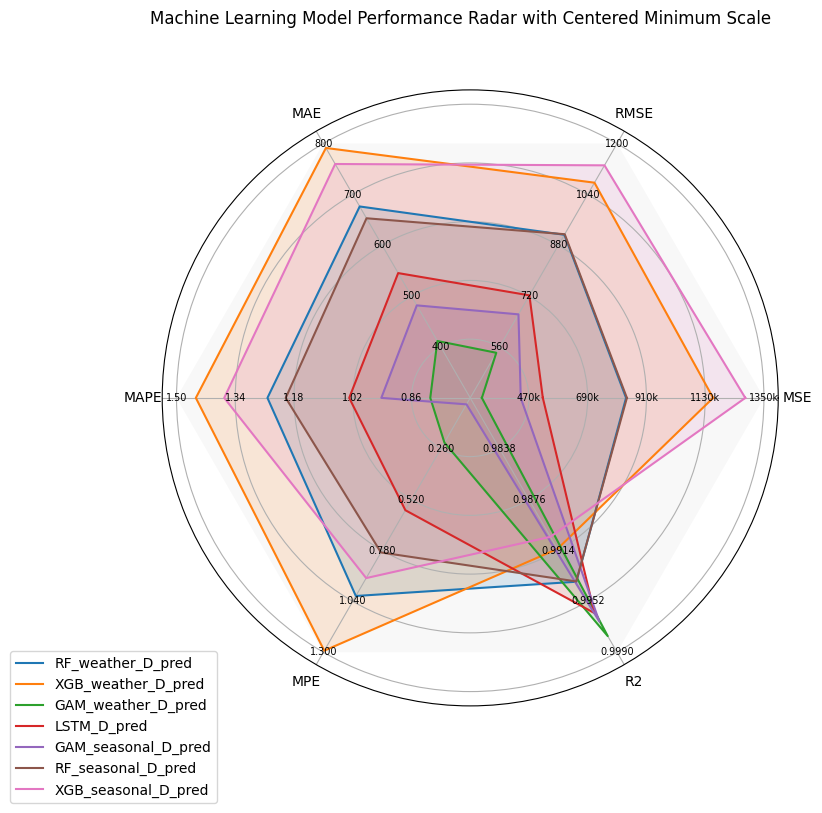

In [26]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

def spider(df, *, id_column, title=None, axis_scale=None, decimal_places=None, padding=1.25):
    categories = df._get_numeric_data().columns.tolist()
    data = df[categories].to_dict(orient='list')
    ids = df[id_column].tolist()
    
    if axis_scale is None:
        raise ValueError("axis_scale must be provided with both minimum and maximum values for each category.")
    
    if decimal_places is None:
        raise ValueError("decimal_places must be provided as a dictionary with the format {'metric_name': number_of_places}.")
    
    # Normalize the data based on provided min and max values for each category
    normalized_data = {}
    for key in data.keys():
        min_val, max_val = axis_scale[key]
        # Normalize to range [0, 1]
        normalized_data[key] = (np.array(data[key]) - min_val) / (max_val - min_val)
    
    num_vars = len(data.keys())
    tiks = list(data.keys())
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    
    # Close the plot for a better look
    angles += angles[:1]
    
    # Create a polar plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    
    for i, model_name in enumerate(ids):
        values = [normalized_data[key][i] for key in data.keys()]
        values += values[:1]  # Close the plot for a better look
        ax.plot(angles, values, label=model_name)
        ax.fill(angles, values, alpha=0.15)
        

    # Add scale limits and labels
    ax.fill(angles, np.ones(num_vars + 1), alpha=0.05)
    ax.set_yticklabels([])  # Clear y-tick labels since we will set our own

    # Set custom ticks and labels for each axis
    for i, key in enumerate(data.keys()):
        min_val, max_val = axis_scale[key]
        # Generate ticks excluding the minimum value
        ticks = np.linspace(min_val, max_val, 6)[1:]  # Skip the first tick which is the min value
        # Add labels to the radial axis
        for tick in ticks:
            # Normalize the tick for positioning on the radar plot
            normalized_tick = (tick - min_val) / (max_val - min_val)
            
            # Format number based on decimal places
            if tick > 10000:
                tick_label = f'{tick / 1000:.0f}k'
            else:
                decimal = decimal_places.get(key, 3)  # Default to 3 decimal places if not specified
                tick_label = f'{tick:.{decimal}f}'  # Format with specified decimal places
            
            angle = angles[i]
            # Adjust the position of the labels slightly outward
            ax.text(angle, normalized_tick, tick_label, ha='center', va='center', size='x-small')

        

    # Set x-ticks and labels for each axis
    ax.set_xticks(angles[:-1])  # Set x-ticks without the last duplicate
    ax.set_xticklabels(tiks)  # Set labels for each category (same number as angles[:-1])
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    
    if title is not None: 
        plt.suptitle(title)
    plt.show()

# Define the data
data = {
    'Model': ['RF_weather_D_pred', 'XGB_weather_D_pred', 'GAM_weather_D_pred', 'LSTM_D_pred', 
              'GAM_seasonal_D_pred', 'RF_seasonal_D_pred', 'XGB_seasonal_D_pred'],
    'MSE': [833706.3999, 1159725.418, 293701.3174, 521971.5566, 439287.808, 836843.4593, 1280221.56],
    'RMSE': [913.0752433, 1076.905483, 541.9421716, 722.4759903, 662.7879058, 914.791484, 1131.468762],
    'MAE': [676.2996588, 791.3306802, 411.8775556, 545.3431616, 481.8680829, 653.1032492, 759.7957245],
    'MAPE': [1.252341821, 1.447378015, 0.80880668, 1.029626364, 0.942160254, 1.202525162, 1.370060304],
    'MPE': [1.012506613, 1.292012574, 0.228397537, 0.574099555, 0.033016666, 0.790100485, 0.921049338],
    'R2': [0.993733702, 0.991283281, 0.997792484, 0.996076761, 0.996698228, 0.993710124, 0.990377609]
}

# Create DataFrame
df = pd.DataFrame(data)

# Define axis scale with min and max values for each metric
axis_scale = {
    'MSE': (250000, 1350000),   # (min, max)
    'RMSE': (400, 1200),        # (min, max)
    'MAE': (300, 800),          # (min, max)
    'MAPE': (0.7, 1.5),         # (min, max)
    'MPE': (0, 1.3),            # (min, max)
    'R2': (0.98, 0.999)             # (min, max)
}

# Define decimal places for each metric
decimal_places = {
    'MSE': 0,
    'RMSE': 0,
    'MAE': 0,
    'MAPE': 2,
    'MPE': 3,
    'R2': 4
}

# Call the spider function with custom axis scale and decimal places
spider(
    df,
    id_column='Model',
    title='Machine Learning Model Performance Radar with Centered Minimum Scale',
    axis_scale=axis_scale,
    decimal_places=decimal_places,
    padding=1.1
)


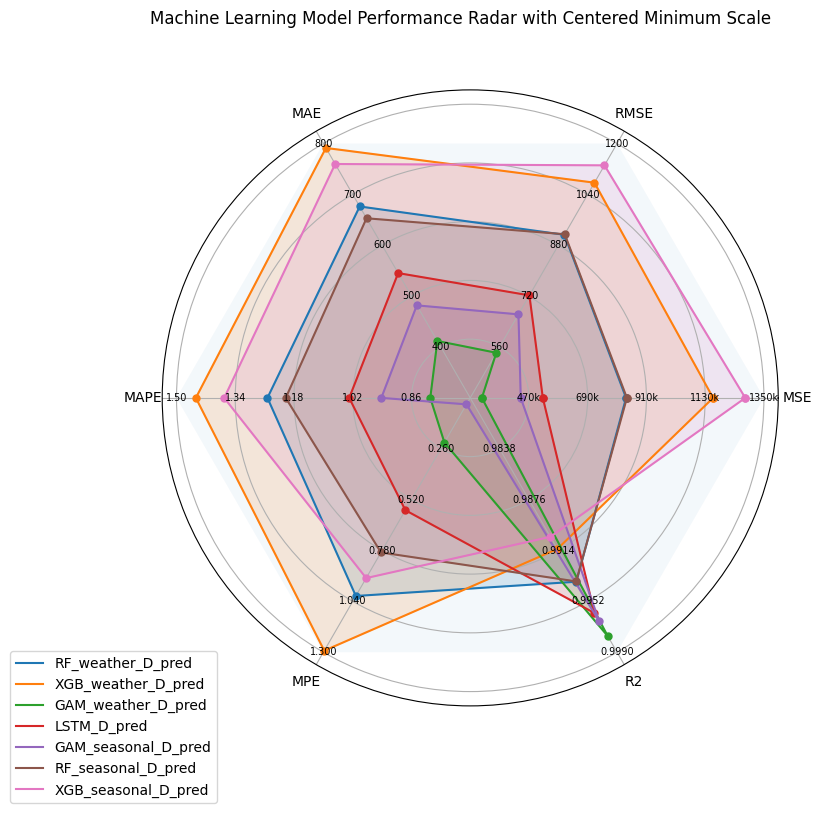

In [35]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

def spider(df, *, id_column, title=None, axis_scale=None, decimal_places=None, padding=1.25):
    categories = df._get_numeric_data().columns.tolist()
    data = df[categories].to_dict(orient='list')
    ids = df[id_column].tolist()
    
    if axis_scale is None:
        raise ValueError("axis_scale must be provided with both minimum and maximum values for each category.")
    
    if decimal_places is None:
        raise ValueError("decimal_places must be provided as a dictionary with the format {'metric_name': number_of_places}.")
    
    # Normalize the data based on provided min and max values for each category
    normalized_data = {}
    for key in data.keys():
        min_val, max_val = axis_scale[key]
        # Normalize to range [0, 1]
        normalized_data[key] = (np.array(data[key]) - min_val) / (max_val - min_val)
    
    num_vars = len(data.keys())
    tiks = list(data.keys())
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    
    # Close the plot for a better look
    angles += angles[:1]
    
    # Create a polar plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    
    for i, model_name in enumerate(ids):
        values = [normalized_data[key][i] for key in data.keys()]
        values += values[:1]  # Close the plot for a better look
        color = f"C{i}"  # Get a color from the default color cycle
        ax.plot(angles, values, label=model_name, color=color)
        ax.fill(angles, values, color=color, alpha=0.15)

        # Add dots at the end of each line with the same color
        ax.plot(angles, values, 'o', markersize=5, color=color)  # 'o' is the marker style for dots
    

    # Add scale limits and labels
    ax.fill(angles, np.ones(num_vars + 1), alpha=0.05)
    ax.set_yticklabels([])  # Clear y-tick labels since we will set our own

    # Set custom ticks and labels for each axis
    for i, key in enumerate(data.keys()):
        min_val, max_val = axis_scale[key]
        # Generate ticks excluding the minimum value
        ticks = np.linspace(min_val, max_val, 6)[1:]  # Skip the first tick which is the min value
        # Add labels to the radial axis
        for tick in ticks:
            # Normalize the tick for positioning on the radar plot
            normalized_tick = (tick - min_val) / (max_val - min_val)
            
            # Format number based on decimal places
            if tick > 10000:
                tick_label = f'{tick / 1000:.0f}k'
            else:
                decimal = decimal_places.get(key, 3)  # Default to 3 decimal places if not specified
                tick_label = f'{tick:.{decimal}f}'  # Format with specified decimal places
            
            angle = angles[i]
            # Adjust the position of the labels slightly outward
            ax.text(angle, normalized_tick, tick_label, ha='center', va='center', size='x-small')

    # Set x-ticks and labels for each axis
    ax.set_xticks(angles[:-1])  # Set x-ticks without the last duplicate
    ax.set_xticklabels(tiks)  # Set labels for each category (same number as angles[:-1])
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    
    if title is not None: 
        plt.suptitle(title)
    plt.show()

# Define the data
data = {
    'Model': ['RF_weather_D_pred', 'XGB_weather_D_pred', 'GAM_weather_D_pred', 'LSTM_D_pred', 
              'GAM_seasonal_D_pred', 'RF_seasonal_D_pred', 'XGB_seasonal_D_pred'],
    'MSE': [833706.3999, 1159725.418, 293701.3174, 521971.5566, 439287.808, 836843.4593, 1280221.56],
    'RMSE': [913.0752433, 1076.905483, 541.9421716, 722.4759903, 662.7879058, 914.791484, 1131.468762],
    'MAE': [676.2996588, 791.3306802, 411.8775556, 545.3431616, 481.8680829, 653.1032492, 759.7957245],
    'MAPE': [1.252341821, 1.447378015, 0.80880668, 1.029626364, 0.942160254, 1.202525162, 1.370060304],
    'MPE': [1.012506613, 1.292012574, 0.228397537, 0.574099555, 0.033016666, 0.790100485, 0.921049338],
    'R2': [0.993733702, 0.991283281, 0.997792484, 0.996076761, 0.996698228, 0.993710124, 0.990377609]
}

# Create DataFrame
df = pd.DataFrame(data)

# Define axis scale with min and max values for each metric
axis_scale = {
    'MSE': (250000, 1350000),   # (min, max)
    'RMSE': (400, 1200),        # (min, max)
    'MAE': (300, 800),          # (min, max)
    'MAPE': (0.7, 1.5),         # (min, max)
    'MPE': (0, 1.3),            # (min, max)
    'R2': (0.98, 0.999)         # (min, max)
}

# Define decimal places for each metric
decimal_places = {
    'MSE': 0,
    'RMSE': 0,
    'MAE': 0,
    'MAPE': 2,
    'MPE': 3,
    'R2': 4
}

# Call the spider function with custom axis scale and decimal places
spider(
    df,
    id_column='Model',
    title='Machine Learning Model Performance Radar with Centered Minimum Scale',
    axis_scale=axis_scale,
    decimal_places=decimal_places,
    padding=1.1
)


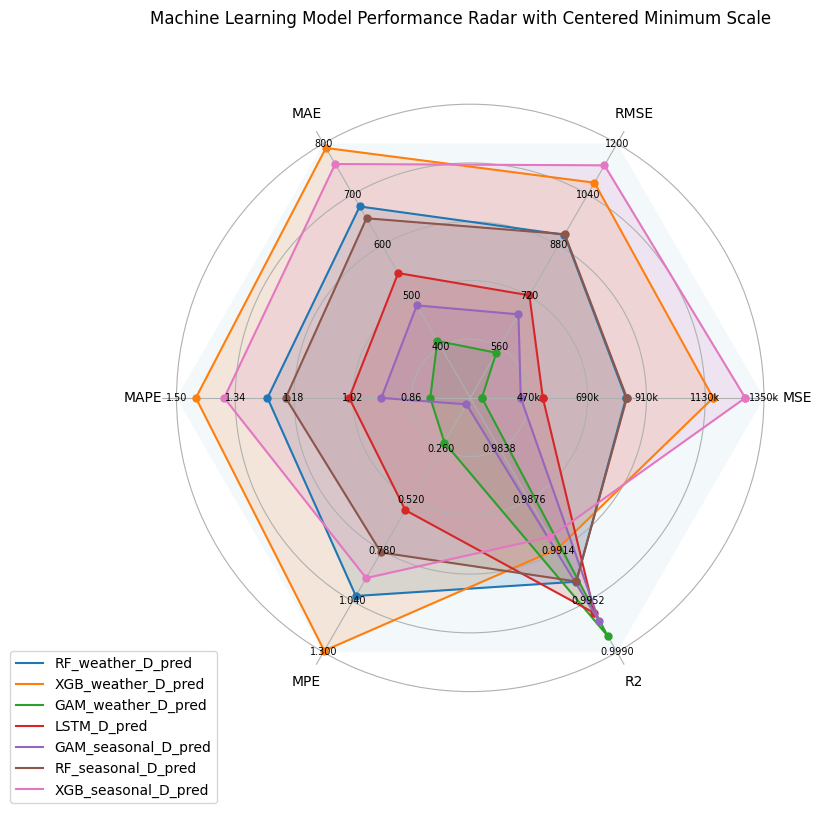

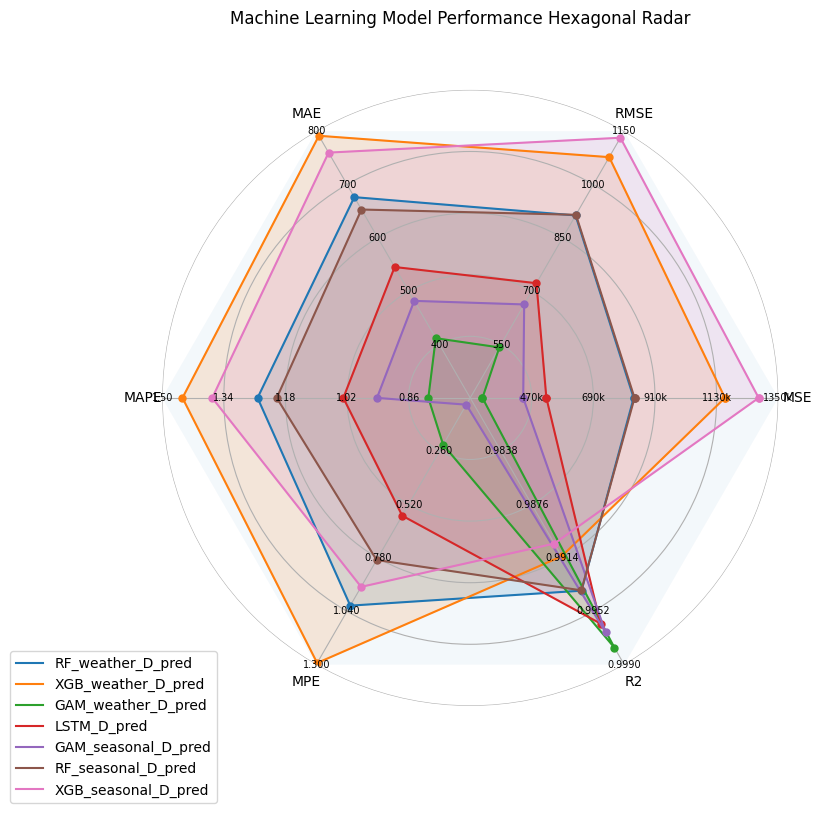

In [42]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

def spider(df, *, id_column, title=None, axis_scale=None, decimal_places=None, padding=1.25):
    categories = df._get_numeric_data().columns.tolist()
    data = df[categories].to_dict(orient='list')
    ids = df[id_column].tolist()
    
    if axis_scale is None:
        raise ValueError("axis_scale must be provided with both minimum and maximum values for each category.")
    
    if decimal_places is None:
        raise ValueError("decimal_places must be provided as a dictionary with the format {'metric_name': number_of_places}.")
    
    # Normalize the data based on provided min and max values for each category
    normalized_data = {}
    for key in data.keys():
        min_val, max_val = axis_scale[key]
        # Normalize to range [0, 1]
        normalized_data[key] = (np.array(data[key]) - min_val) / (max_val - min_val)
    
    num_vars = len(data.keys())
    tiks = list(data.keys())
    
    # Change the angle calculation for a hexagon (6 points)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    
    # Close the plot for a better look
    angles += angles[:1]
    
    # Create a polar plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    
    for i, model_name in enumerate(ids):
        values = [normalized_data[key][i] for key in data.keys()]
        values += values[:1]  # Close the plot for a better look
        color = f"C{i}"  # Get a color from the default color cycle
        ax.plot(angles, values, label=model_name, color=color)
        ax.fill(angles, values, color=color, alpha=0.15)

        # Add dots at the end of each line with the same color
        ax.plot(angles, values, 'o', markersize=5, color=color)  # 'o' is the marker style for dots

    # Remove the outer circumference line and adjust axes
    ax.spines['polar'].set_visible(False)
    
    # Add scale limits and labels
    ax.fill(angles, np.ones(num_vars + 1), alpha=0.05)
    ax.set_yticklabels([])  # Clear y-tick labels since we will set our own

    # Set custom ticks and labels for each axis
    for i, key in enumerate(data.keys()):
        min_val, max_val = axis_scale[key]
        # Generate ticks excluding the minimum value
        ticks = np.linspace(min_val, max_val, 6)[1:]  # Skip the first tick which is the min value
        # Add labels to the radial axis
        for tick in ticks:
            # Normalize the tick for positioning on the radar plot
            normalized_tick = (tick - min_val) / (max_val - min_val)
            
            # Format number based on decimal places
            if tick > 10000:
                tick_label = f'{tick / 1000:.0f}k'
            else:
                decimal = decimal_places.get(key, 3)  # Default to 3 decimal places if not specified
                tick_label = f'{tick:.{decimal}f}'  # Format with specified decimal places
            
            angle = angles[i]
            # Adjust the position of the labels slightly outward
            ax.text(angle, normalized_tick, tick_label, ha='center', va='center', size='x-small')

    # Set y-ticks to extend to the edges
    ax.set_ylim(0, 1)  # Set the radial limits to cover the full range

    # Set x-ticks and labels for each axis
    ax.set_xticks(angles[:-1])  # Set x-ticks without the last duplicate
    ax.set_xticklabels(tiks)  # Set labels for each category (same number as angles[:-1])
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    
    if title is not None: 
        plt.suptitle(title)
    plt.show()

# Define the data
data = {
    'Model': ['RF_weather_D_pred', 'XGB_weather_D_pred', 'GAM_weather_D_pred', 'LSTM_D_pred', 
              'GAM_seasonal_D_pred', 'RF_seasonal_D_pred', 'XGB_seasonal_D_pred'],
    'MSE': [833706.3999, 1159725.418, 293701.3174, 521971.5566, 439287.808, 836843.4593, 1280221.56],
    'RMSE': [913.0752433, 1076.905483, 541.9421716, 722.4759903, 662.7879058, 914.791484, 1131.468762],
    'MAE': [676.2996588, 791.3306802, 411.8775556, 545.3431616, 481.8680829, 653.1032492, 759.7957245],
    'MAPE': [1.252341821, 1.447378015, 0.80880668, 1.029626364, 0.942160254, 1.202525162, 1.370060304],
    'MPE': [1.012506613, 1.292012574, 0.228397537, 0.574099555, 0.033016666, 0.790100485, 0.921049338],
    'R2': [0.993733702, 0.991283281, 0.997792484, 0.996076761, 0.996698228, 0.993710124, 0.990377609]
}

# Create DataFrame
df = pd.DataFrame(data)

# Define axis scale with min and max values for each metric
axis_scale = {
    'MSE': (250000, 1350000),   # (min, max)
    'RMSE': (400, 1150),        # (min, max)
    'MAE': (300, 800),          # (min, max)
    'MAPE': (0.7, 1.5),         # (min, max)
    'MPE': (0, 1.3),            # (min, max)
    'R2': (0.98, 0.999)         # (min, max)
}

# Define decimal places for each metric
decimal_places = {
    'MSE': 0,
    'RMSE': 0,
    'MAE': 0,
    'MAPE': 2,
    'MPE': 3,
    'R2': 4
}

# Call the spider function with custom axis scale and decimal places
spider(
    df,
    id_column='Model',
    title='Machine Learning Model Performance Hexagonal Radar',
    axis_scale=axis_scale,
    decimal_places=decimal_places,
    padding=1.1
)
